# Communicate Data Finding Project
## by Daria Krasnobaeva

## Investigation Overview

> My goals fpr this project were following:
- explore data from Bureau of Transportation Statisctic from April 2010 till March 2020
- see the distibution of different art of delay (Carrier, Weather, NAS, Security and Late Aircraft)
- find out the cause for most of delay based on data of Top 5 carrier in that data
- see the impact of Corona Virus on the data

## Dataset Overview

> The dataset was downloaded from Bureau of Transportation Statistics Website. It contains information about delays and cancellations for different carriers and destinations. The observed period includes data of almost 10 years - from April 2010 till March 2020. The data of the year 2020 give us the opportunity to see the first impact of Corona Virus.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('Project_data_airline_delay_causes.csv')

## Is the distibution of different art of delay (Carrier, Weather, NAS, Security and Late Aircraft) similar?

> I wanted to observe the distribution of diffferent art of delays and to find out is there any simularity. 
As you can see on the next slide, all graphic develope were simular. They all are right skewed (that's why in my futher analysis I used log to go into the detail) and have only one peak. 

>You can also see, that the most amount of short delays caused by weather and NAS. The longest delay was cause by late aircraft delay. I put some limits n my grafic, so we can observe it more close.

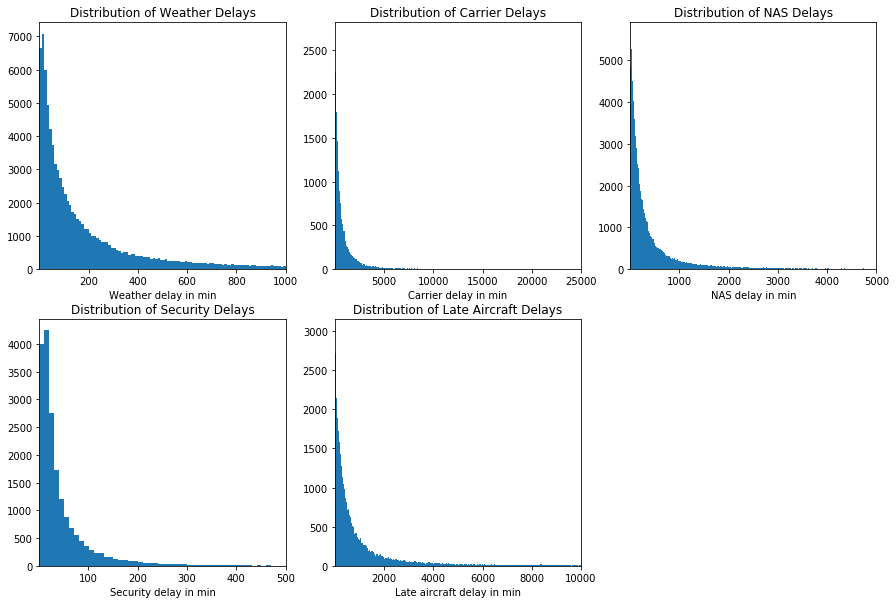

In [3]:
plt.figure(figsize=[15, 10])

plt.subplot(2, 3, 1)
bin_edges=np.arange(0.1,df['weather_delay'].max()+10,10)
plt.hist(data = df, x = 'weather_delay', bins = bin_edges)
plt.xlabel('Weather delay in min')
plt.title('Distribution of Weather Delays')
plt.xlim((0.1,1000));

plt.subplot(2, 3, 2)
bin_edges=np.arange(0.1,df[' carrier_delay'].max()+10,10)
plt.hist(data = df, x = ' carrier_delay', bins = bin_edges)
plt.xlabel('Carrier delay in min')
plt.title('Distribution of Carrier Delays')
plt.xlim((0.1,25000));

plt.subplot(2, 3, 3)
bins =np.arange(1,df['nas_delay'].max()+10,10)
plt.hist(data = df, x = 'nas_delay', bins = bins);
plt.xlabel('NAS delay in min')
plt.title('Distribution of NAS Delays')
plt.xlim((1,5000));

plt.subplot(2, 3, 4)
bins =np.arange(1,df['security_delay'].max()+10,10)
plt.hist(data = df, x = 'security_delay', bins = bins);
plt.title('Distribution of Security Delays')
plt.xlabel('Security delay in min')
plt.xlim((1,500));

plt.subplot(2, 3, 5)
bins =np.arange(1,df['late_aircraft_delay'].max()+10,10)
plt.hist(data = df, x = 'late_aircraft_delay', bins = bins);
plt.title('Distribution of Late Aircraft Delays')
plt.xlabel('Late aircraft delay in min')
plt.xlim((1,10000));

## In which Year we had the most high cancelation rate and how was the situation at the start of Corona Virus in 2020? Which carrier had the most of delays over the years?

> In the first scatteplot we could already see the impact of Corona Virus on our data (outliers in 2020). In the Subplot we see, that after only 3 Month of 2020 we almost reach the level of cancelation of 2019. The 2019 is the year with the most cancelations, according to the data. My guess, that after the actualisation of data 2020 that will hit the bar.

>We took the 5 most common carrier in the data set and also analysed, which one had the most of cancelations. After the observation it is clear, that American Airlines Inc. having the most if delays, espacially a lot Carrier delays. Express Airlines Inc. showed the interesting development from having a lot of delays to have less delays than other carriers. Sadly there is now data for 2020 from this company available.


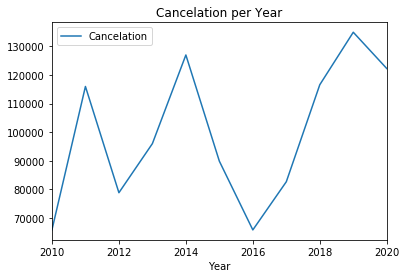

In [4]:
fig, ax = plt.subplots()
sums = df.groupby(['year'])['arr_cancelled'].sum().reset_index(level=0)

# Use ax 
sums.plot(x='year',y='arr_cancelled', ax=ax, label='Cancelation')
ax.set_title("Cancelation per Year")
plt.xlabel('Year');

In [5]:
df_sub = df.loc[df['carrier_name'].isin(['United Air Lines Inc.','American Airlines Inc.','SkyWest Airlines Inc.','Delta Air Lines Inc.','ExpressJet Airlines Inc.'])]

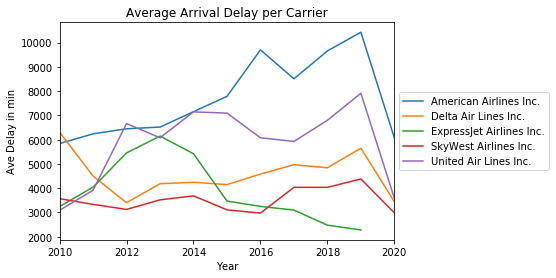

In [6]:
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])[' arr_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y=' arr_delay', ax=ax, label=carrier)

ax.set_title("Average Arrival Delay per Carrier")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Ave Delay in min')
plt.show()

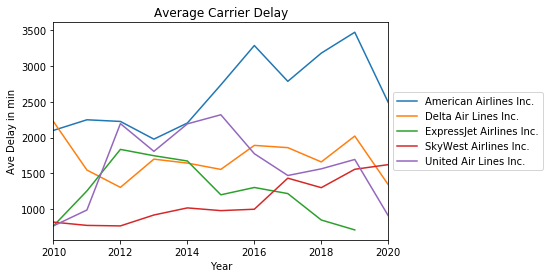

In [7]:
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])[' carrier_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y=' carrier_delay', ax=ax, label=carrier)

ax.set_title("Average Carrier Delay")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Ave Delay in min')
plt.show()

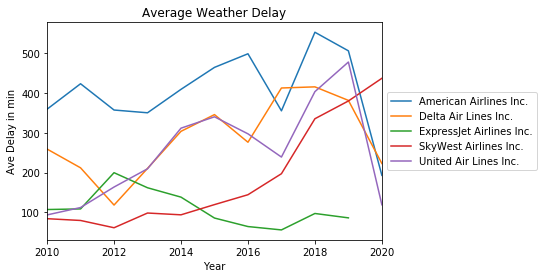

In [8]:
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['weather_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='weather_delay', ax=ax, label=carrier)

ax.set_title("Average Weather Delay")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Ave Delay in min')
plt.show()

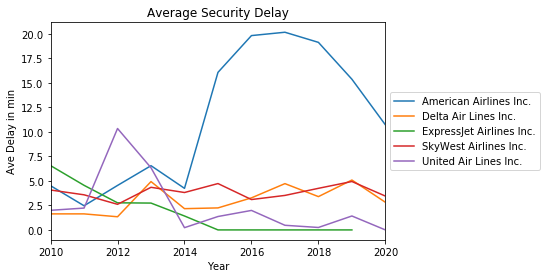

In [9]:
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['security_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='security_delay', ax=ax, label=carrier)

ax.set_title("Average Security Delay")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Ave Delay in min')
plt.show()

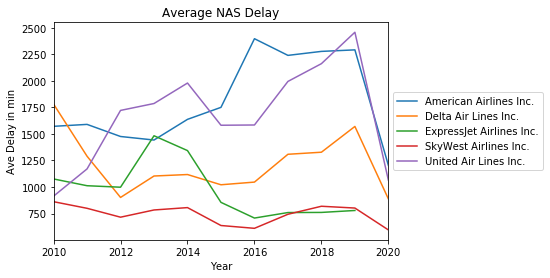

In [10]:
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['nas_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='nas_delay', ax=ax, label=carrier)

ax.set_title("Average NAS Delay")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Ave Delay in min')
plt.show()

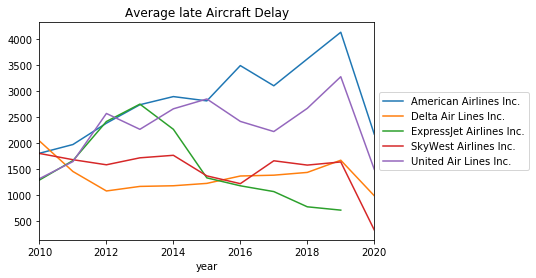

In [11]:
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['late_aircraft_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='late_aircraft_delay', ax=ax, label=carrier)

ax.set_title("Average late Aircraft Delay")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## What was the cause of the most delays by 5 more common carrier in the data set?

> According to my analysis late aircraft delays are the most popular delays. On the econd place it is carrier delay followed by nas delay and weather delay. 

> Also, it was interesting to see, that weather delays actually playing not such a big roll in the whole picture. As well as that due to Corona Virus the carrie delay went on the 1st place in 2020.



In [12]:
df_sub= df_sub.rename(columns={" carrier_delay": "carrier_delay"})

#for my analysis I will creat a new dataframe only with mean information per year per delay art.
weather_by_year=df_sub.query('weather_delay>0.0').groupby('year')['weather_delay'].mean().reset_index(name='weather_delay')
carrier_by_year=df_sub.query('carrier_delay>0.0').groupby('year')['carrier_delay'].mean().reset_index(name='carrier_delay')
nas_by_year=df_sub.query('nas_delay>0.0').groupby('year')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_year=df_sub.query('security_delay>0.0').groupby('year')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_year=df_sub.query('late_aircraft_delay>0.0').groupby('year')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

temp=weather_by_year.merge(nas_by_year,on='year')
temp=temp.merge(security_by_year,on='year')
temp=temp.merge(carrier_by_year,on='year')
delays_by_year=temp.merge(lateaircraft_by_year,on='year')

In [13]:
#melting the df
delays_df= df_sub.melt(id_vars = ['year'], 
                          value_vars = ['weather_delay','nas_delay','security_delay','carrier_delay','late_aircraft_delay'], 
                          var_name = 'delays_types', value_name = 'delay_min').dropna()
delays_df.head()

,year,delays_types,delay_min
0,2010,weather_delay,212.0
1,2010,weather_delay,77.0
2,2010,weather_delay,340.0
3,2010,weather_delay,15.0
4,2010,weather_delay,16.0


In [14]:
#Transforming the DF to have only one entry per year per delay
delays_mean= delays_df.groupby(['delays_types','year'])['delay_min'].mean().reset_index(level=0)


In [15]:
delays_mean.delays_types = delays_mean.delays_types.replace('weather_delay', 'Weather Delay')
delays_mean.delays_types = delays_mean.delays_types.replace('nas_delay', 'NAS Delay')
delays_mean.delays_types = delays_mean.delays_types.replace('security_delay', 'Security Delay')
delays_mean.delays_types = delays_mean.delays_types.replace('carrier_delay', 'Carrier Delay')
delays_mean.delays_types = delays_mean.delays_types.replace('late_aircraft_delay', 'Late Aircraft Delay')

In [16]:
delays_mean

,delays_types,delay_min
year,,
2010,Carrier Delay,1294.130267
2011,Carrier Delay,1296.985701
2012,Carrier Delay,1552.942958
2013,Carrier Delay,1563.020408
2014,Carrier Delay,1626.178038
2015,Carrier Delay,1554.754503
2016,Carrier Delay,1674.566093
2017,Carrier Delay,1668.836946
2018,Carrier Delay,1606.958682


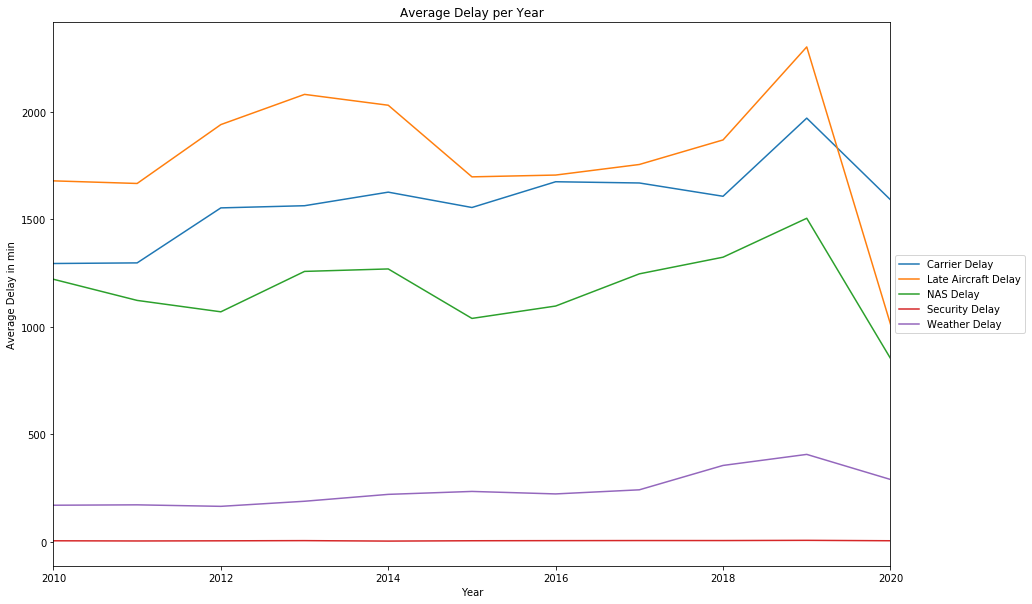

In [17]:
# making a loop for mean per Year
fig, ax = plt.subplots(figsize = [15,10])
#sums = delays.groupby(['delays_types','year'])['late_aircraft_delay'].mean().reset_index(level=0)

# Use ax for both
for reason in delays_mean['delays_types'].unique():
    delays_mean[delays_mean['delays_types'] == reason].plot(y='delay_min', ax=ax, label=reason)

ax.set_title("Average Delay per Year")

plt.xlabel('Year')
plt.ylabel('Average Delay in min')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
!jupyter nbconvert "Project_7_Slide_Deck_DK.ipynb" --to slides --post serve --template output_toggle